In [2]:
import pandas as pd
df = pd.read_csv("c:/data/concrete/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [3]:
train_cols = ['flag', 'ash', 'water', 'superplastic',
'coarseagg', 'findagg', 'age',
'strength']
print(train_cols)
X = df[train_cols]
y = df["class"]

['flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age', 'strength']


In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [5]:
df2["class"].value_counts()

0    507
1    507
Name: class, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [8]:
print(" 학습용 :",model1.score(X_train, y_train))
print(" 검증용 :",model1.score(X_test, y_test))

 학습용 : 1.0
 검증용 : 0.9854368932038835


In [9]:
# : 판별함수 음수이면 0, 양수이면 1로 판별함 0이 판별기준이 됨
model1.decision_function(X_test[:5])

array([-68.80990148, -14.82125132, -77.40366302,   2.67204951,
        19.22005947])

In [10]:
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)


SVC(random_state=0)

In [11]:
print(" 학습용 :",model2.score(X_train, y_train))
print(" 검증용 :",model2.score(X_test, y_test))

 학습용 : 0.8410194174757282
 검증용 : 0.8058252427184466


In [12]:
model2.decision_function(X_test)

array([-1.34693068e+00, -5.77033054e-01, -1.19073248e+00, -3.74141828e-01,
       -3.31613634e-01,  4.33336564e-01,  2.45347364e-01,  2.36404180e-01,
        1.78024849e-01, -1.12581678e+00, -5.49515624e-01,  4.32998953e-01,
       -1.70292060e-02,  5.41544568e-01, -2.00770266e-01,  1.04200806e+00,
       -2.66077175e-02,  1.12210120e-03, -1.34305147e-01, -6.71139486e-01,
       -1.74867211e-01, -3.00953972e-01, -3.10671749e-01, -5.43861558e-01,
        4.80339215e-02, -8.47147344e-01, -1.02784725e+00, -7.61739301e-01,
        2.92520207e-01,  1.76888048e-01,  1.28033310e+00,  8.53501468e-01,
        2.34367568e+00,  4.89602880e-01,  1.01211209e-01,  2.52745280e+00,
       -9.60300059e-01,  2.03372086e-01,  3.08894789e-01,  3.19907064e+00,
       -6.69461086e-01,  1.18320533e+00,  1.98316460e-01, -1.18109497e+00,
       -5.19510714e-01, -1.02737153e+00,  3.90374991e-01,  6.41335344e-02,
       -3.21125229e-01, -1.01629192e+00, -6.12157656e-01, -3.02051918e-01,
       -3.84198476e-01, -

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#TPR(True Positive Rate, ) - 1 1 , y 민감도 을 로 잘 맞춘 비율 축
#FPR(False Positive Rate, ) - 0 1 , x 특이도 을 로 틀린 비율 축
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))
# 면적(0.5~1.0)이 1에 가까울수록 (좌측상단 꼭지점에 다가갈수록) 좋은 모형

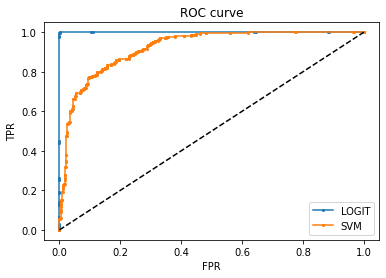

In [14]:
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
# 좌측상단 꼭지점에 가까울수록 더 좋은 모형

In [15]:
#AUC(Area Under the Curve) : ROC Curve의 면적
#1에 가까울수록 좋은 모형
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9999886861189994, 0.9225979687812309)